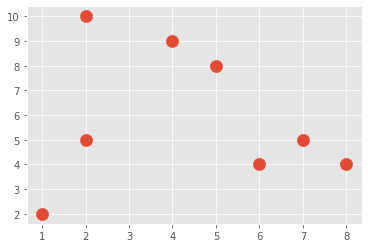

73.33333333333333


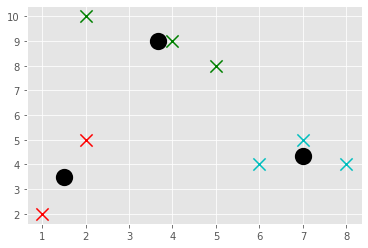

250.0
50.0
53.97727272727274


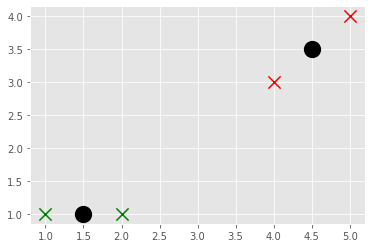

1.5
1.0
4.5
3.5


In [1]:


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
Y = np.array([[1,1],[2,1],[4,3],[5,4]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

clf1 = K_Means(2,0.001,300)
clf1.fit(Y)

for centroid in clf1.centroids:
    plt.scatter(clf1.centroids[centroid][0], clf1.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf1.classifications:
    color = colors[classification]
    for featureset in clf1.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

for centroid in clf1.centroids:
    print(clf1.centroids[centroid][0])
    print(clf1.centroids[centroid][1])




[2, 2, 8, 5, 7, 6, 1, 4, 12, 22, 11, 3, 34, 43]
[10, 5, 4, 8, 5, 4, 2, 9, 11, 34, 22, 6, 34, 45]
[[ 2 10]
 [ 2  5]
 [ 8  4]
 [ 5  8]
 [ 7  5]
 [ 6  4]
 [ 1  2]
 [ 4  9]
 [12 11]
 [22 34]
 [11 22]
 [ 3  6]
 [34 34]
 [43 45]]


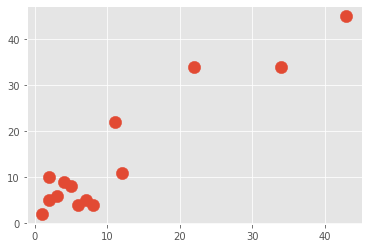

738.3333333333334
257.5
147.85829741379314
147.00854700854703
31.60493827160493
45.833333333333336


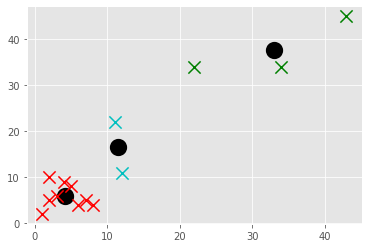

In [2]:
import csv
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
with open('./Data1.csv') as csvfile:
    readCSV = csv.reader(csvfile)
    X=[]
    Y=[]
    i=0
    for row in readCSV:
        X.append(int(row[0]))
        Y.append(int(row[1]))
        i=i+1
        
print(X)
print(Y)

Arr = np.array([[ 0 for x in range(2)] for y in range(len(X))])

for i in range(len(X)):
    Arr[i][0]=X[i]
    Arr[i][1]=Y[i]
    
print(Arr)
plt.scatter(Arr[:,0],Arr[:,1],s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

clf = K_Means()
clf.fit(Arr)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()